# U.S. Medical Insurance Costs

In this project we will organize the information from insurance.csv by storing the data into variables that can be used for analysis. In this project, a **CSV** file with medical insurance costs will be investigated using Python fundamentals. The goal with this project will be to analyze various attributes within **insurance.csv** to learn more about the patient information in the file and gain insight into potential use cases for the dataset.

***
## Modules

To start, all necessary libraries must be imported

In [400]:
import csv
import matplotlib.pyplot as plt
from IPython.display import Markdown as md

***
## Getting all the Data

In [401]:
insurance_data = []
with open('insurance.csv') as insurance_file:
    data_dict = csv.DictReader(insurance_file)
    for i in data_dict:
        insurance_data.append(i)

`insurance.csv` contains the following columns:
* Patient Age
* Patient Sex
* Patient BMI
* Patient Number of Children
* Patient Smoking Status
* Patient U.S Geopraphical Region
* Patient Yearly Medical Insurance Cost

**So we will be adding those columns into the different lists**

In [402]:
ages = [int(i['age']) for i in insurance_data]
sex = [i['sex'] for i in insurance_data]
bmis = [float(i['bmi']) for i in insurance_data]
children = [int(i['children']) for i in insurance_data]
regions = [i['region'] for i in insurance_data]
charges = [float(i['charges']) for i in insurance_data]
smokers = [i['smoker']for i in insurance_data]

Now that all the data from insurance.csv neatly organized into labeled lists, the analysis can be started. This is where one must plan out what to investigate and how to perform the analysis. There are many aspects of the data that could be looked into. The following operations will be implemented:

* Find the amount of smokers and the percentage that they represent on the dataset
* Find geographical location of the patients and their distribution
* Return the number of males vs. females counted in the dataset
* Return the max, min and average yearly medical charges of the patients
* Return information about patient children
* Return the amount of people with obesity by gender
* Find the consecuences that having IBM values implies on the medical insurance cost.
* Find average age of the patients


***
## Smokers Info

### Amount of Smokers and Non-Smokers

In [403]:
smokers_list = []
non_smokers_list = []

for i in smokers:
    if i == 'yes':
        smokers_list.append(i)
    else:
        non_smokers_list.append(i)
        
total_smokers = len(smokers_list)
total_non_smokers = len(non_smokers_list)

md(f"""
The **total number** of smokers: **{total_smokers}**\n
The **total number** of **non**-smokers: **{total_non_smokers}**\n
""") 


The **total number** of smokers: **274**

The **total number** of **non**-smokers: **1064**



### Percentage of Smokers and Non-Smokers


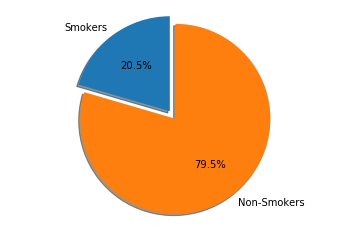


**Smokers** percentage: **20.48%**

**Non-Smokers** percentage: **79.52%**



In [404]:
smokers_percentage = round(((total_smokers/len(insurance_data))*100),2)
non_smokers_percentage = round(((total_non_smokers/len(insurance_data))*100),2)

labels = 'Smokers', 'Non-Smokers'
sizes = [smokers_percentage, non_smokers_percentage]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

md(f"""
**Smokers** percentage: **{smokers_percentage}%**\n
**Non-Smokers** percentage: **{non_smokers_percentage}%**\n
""") 

***
## Region Info

### Population Percentage by Region

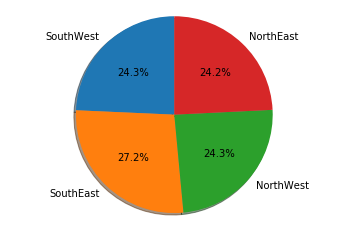


Total of residents in SouthWest: **325**

Total of residents in SouthEast: **364**

Total of residents in NorthWest: **325**

Total of residents in NorthEast: **324**



In [405]:
def count_population(region_list):
    setted_values = list(set(region_list))
    my_dict = {}
    for i in region_list:
        if i not in my_dict and i in setted_values:
            my_dict[i] = 1
        else:
             my_dict[i] += 1
    return my_dict
            
population_by_region = count_population(regions)

labels = 'SouthWest', 'SouthEast', 'NorthWest', 'NorthEast'
sizes = [round(((population_by_region['southwest']/len(regions))*100),2), round(((population_by_region['southeast']/len(regions))*100),2),round(((population_by_region['northwest']/len(regions))*100),2),round(((population_by_region['northeast']/len(regions))*100),2)]
explode = (0, 0, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

md(f"""
Total of residents in SouthWest: **{population_by_region['southwest']}**\n
Total of residents in SouthEast: **{population_by_region['southeast']}**\n
Total of residents in NorthWest: **{population_by_region['northwest']}**\n
Total of residents in NorthEast: **{population_by_region['northeast']}**\n
""") 

***
## Gender Info

### Gender Distribution

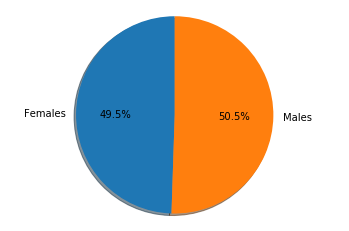


Total of **Females**: 662

Total of **Males**: 676



In [406]:
males = 0
females = 0 
for i in sex:
    if i == 'female':
        females+=1
    else:
        males +=1 
        
md(f"""
Total of **Females**: {females}\n
Total of **Males**: {males}\n
""") 

labels = 'Females', 'Males'
sizes = [round(females/len(sex)*100,2),round(males/len(sex)*100,2)]
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()

md(f"""
Total of **Females**: {females}\n
Total of **Males**: {males}\n
""") 

***
## Charges Info

### Ranges and Mean

In [407]:
max_charge = round(max(charges),2)
min_charge = round(min(charges),2)
total_charge = round(sum(charges),2)
average_charge = round(total_charge/len(charges),2)

md(f"""
The **greatest amount of money** charged: **${max_charge}**\n
The **least amount of money** charged: **${min_charge}**\n
The **average charge** for and individual: **${average_charge}**
""")


The **greatest amount of money** charged: **$63770.43**

The **least amount of money** charged: **$1121.87**

The **average charge** for and individual: **$13270.42**


***
## Children Info

### Ranges and Mean

In [408]:
max_children = round(max(children),2)
min_child = round(min(children),2)
total_children = round(sum(children),2)
average_children = round(total_children/len(children))


md(f"""
The **max** number of children that a person has: **{max_children}**\n
The **min** number of children that a person has: **{min_child}**\n
The **total amount** of children: **{total_children}**\n
The **average number** of children per person: **{average_children}** 
""") 



The **max** number of children that a person has: **5**

The **min** number of children that a person has: **0**

The **total amount** of children: **1465**

The **average number** of children per person: **1** 


***
## BMI Info

[What is BMI?](#What-is-BMI?)

### Range and Mean

In [409]:
max_bmi = round(max(bmis),2)
min_bmi = round(min(bmis),2)
total_bmi = round(sum(bmis),2)
average_bmi = round(total_bmi/len(bmis),2)

md(f"""
The **max** BMI recorded by a person: **{max_bmi} kg/m2** , **{round(max_bmi-average_bmi,2)} kg/m2** over the average BMI \n
The **min** BMI recorded by a person: **{min_bmi} kg/m2** , **{round(average_bmi-min_bmi,2)} kg/m2** under the average BMI \n\n
The **average** BMI per person: **{average_bmi} kg/m2** \n 
""") 


The **max** BMI recorded by a person: **53.13 kg/m2** , **22.47 kg/m2** over the average BMI 

The **min** BMI recorded by a person: **15.96 kg/m2** , **14.7 kg/m2** under the average BMI 


The **average** BMI per person: **30.66 kg/m2** 
 


### Charges by BMI

In [410]:
def obese_cost_comparison(obese_people,non_obese_people):   
    obese_costs = [float(i['charges']) for i in obese_people]
    non_obese_costs = [float(i['charges']) for i in non_obese_people]   
    return round(sum(obese_costs) / len(obese_people),2), round(sum(non_obese_costs) / len(non_obese_people),2)

obese_average_cost,non_obese_average_cost = obese_cost_comparison(obese_people,non_obese_people)

obese_diff = obese_average_cost - non_obese_average_cost


md(f"""
The **average cost** for an obese person: **${obese_average_cost}**\n
The **average cost** for a non obese person: **${non_obese_average_cost}**\n
An obese person pays **${obese_diff}** more than a non obese person
""") 


The **average cost** for an obese person: **$15552.34**

The **average cost** for a non obese person: **$10713.67**

An obese person pays **$4838.67** more than a non obese person


### Amount of people with obesity

In [411]:
obese_people = [i for i in insurance_data if float(i['bmi']) >= 30]
non_obese_people = [i for i in insurance_data if float(i['bmi']) < 30]
obese_men = [i for i in obese_people if i['sex'] == 'male']
obese_women = [i for i in obese_people if i['sex'] == 'female']

md(f"""
Men with obesity: **{len(obese_men)}**\n
Women with obesity: **{len(obese_women)}**\n
""") 




Men with obesity: **373**

Women with obesity: **334**



### Obesity Percentage by Gender¶

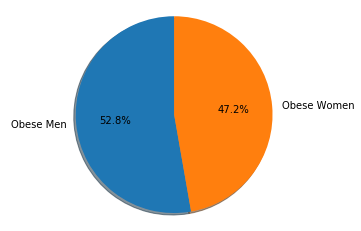

In [412]:
labels = 'Obese Men', 'Obese Women'
sizes = [round((len(obese_men)/len(insurance_data)*100),2),round((len(obese_women)/len(insurance_data)*100),2)]
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

### Obese Smokers Percentage 

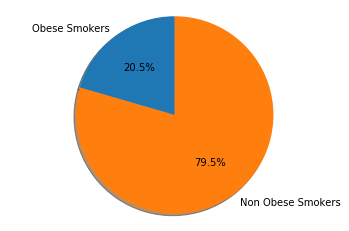

In [413]:
obese_smokers = [i for i in obese_people if i['smoker'] == 'yes']
non_obese_smokers = [i for i in obese_people if i['smoker'] == 'no']

labels = 'Obese Smokers', 'Non Obese Smokers'
sizes = [round((len(obese_smokers)/len(obese_people)*100),2),round((len(non_obese_smokers)/len(obese_people)*100),2)]
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.show()


***
## Ages Info

### Ranges and Mean

In [414]:
max_age = round(max(ages),2)
min_age = round(min(ages),2)
total_ages = round(sum(ages),2)
average_age = round(total_ages/len(ages))

md(f"""
The **oldest** person is : **{max_age} years old**\n
The **youngest** person is: **{min_age} years old**\n
The **average age** person is: **{average_age} years old**\n 
""") 


The **oldest** person is : **64 years old**

The **youngest** person is: **18 years old**

The **average age** person is: **39 years old**
 


***
## Annexes

### What is BMI?

Body mass index (BMI) is a value derived from the mass (weight) and height of a person. The BMI is defined as the body mass divided by the square of the body height, and is universally expressed in units of kg/m2, resulting from mass in kilograms and height in metres.


<table class="wikitable"><tbody><tr><th rowspan="2">Category</th><th colspan="2">BMI (kg/m<sup>2</sup>)</th><th colspan="2">BMI Prime</th></tr><tr><th>from</th><th>to</th><th>from</th><th>to</th></tr><tr><td>Very severely underweight</td><td></td><td>15</td><td></td><td>0.60</td></tr><tr><td>Severely underweight</td><td>15</td><td>16</td><td>0.60</td><td>0.64</td></tr><tr><td>Underweight</td><td>16</td><td>18.5</td><td>0.64</td><td>0.74</td></tr><tr><td>Normal (healthy weight)</td><td>18.5</td><td>25</td><td>0.74</td><td>1.0</td></tr><tr><td>Overweight</td><td>25</td><td>30</td><td>1.0</td><td>1.2</td></tr><tr><td>Obese Class I (Moderately obese)</td><td>30</td><td>35</td><td>1.2</td><td>1.4</td></tr><tr><td>Obese Class II (Severely obese)</td><td>35</td><td>40</td><td>1.4</td><td>1.6</td></tr><tr><td>Obese Class III (Very severely obese)</td><td>40</td><td></td><td>1.6</td><td></td></tr></tbody></table>